# World Bank's World Development Indicators vs. Environment Analysis - Analysis Notebook

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [138]:
%run ./help_funcs.ipynb

## Climate Change/Pollution Indicators

We now check out the data from the World Banks that we know direcly impact the environment adversely

### CO2 Emissions

#### Loading and checking dataset

In [139]:
co2_descdf, co2_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_CO2_World_Development_Indicators/World_Bank_CO2_World_Development_Indicators_Data.csv')

In [140]:
display(co2_descdf.sort_values('Series Code'))

,Series Code,Series Name
8,EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total)
0,EN.ATM.CO2E.KT,CO2 emissions (kt)
7,EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total)
1,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
4,EN.ATM.CO2E.SF.ZS,CO2 emissions from solid fuel consumption (% of total)
5,EN.CO2.BLDG.ZS,CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
2,EN.CO2.ETOT.ZS,"CO2 emissions from electricity and heat production, total (% of total fuel combustion)"
6,EN.CO2.MANF.ZS,CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
3,EN.CO2.OTHX.ZS,"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)"
9,EN.CO2.TRAN.ZS,CO2 emissions from transport (% of total fuel combustion)


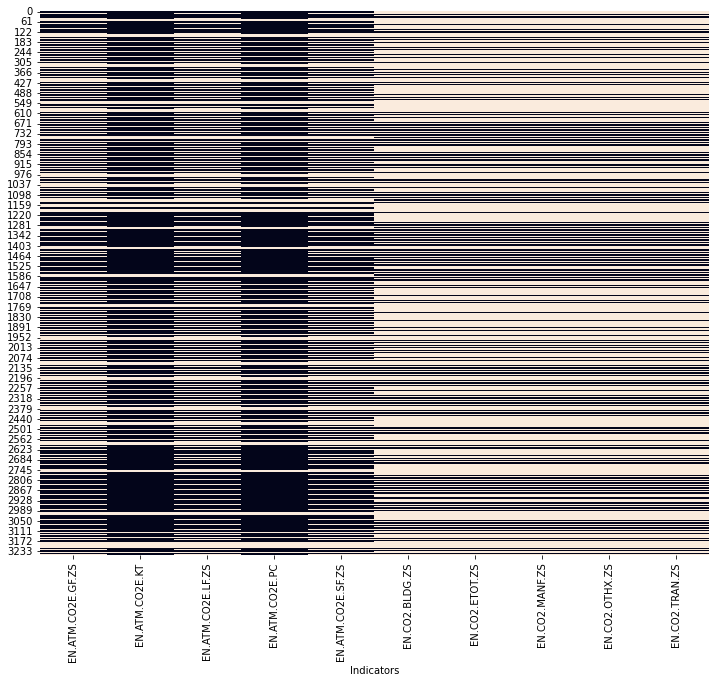

Percentage of Null values in Dataset:


EN.ATM.CO2E.GF.ZS    41.597542
EN.ATM.CO2E.KT       23.717358
EN.ATM.CO2E.LF.ZS    41.597542
EN.ATM.CO2E.PC       23.717358
EN.ATM.CO2E.SF.ZS    41.597542
EN.CO2.BLDG.ZS       65.253456
EN.CO2.ETOT.ZS       65.253456
EN.CO2.MANF.ZS       65.253456
EN.CO2.OTHX.ZS       65.253456
EN.CO2.TRAN.ZS       65.253456
dtype: float64

Year = 2007


EN.ATM.CO2E.GF.ZS    12.442396
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    12.442396
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    12.442396
EN.CO2.BLDG.ZS       35.023041
EN.CO2.ETOT.ZS       35.023041
EN.CO2.MANF.ZS       35.023041
EN.CO2.OTHX.ZS       35.023041
EN.CO2.TRAN.ZS       35.023041
dtype: float64

Year = 2008


EN.ATM.CO2E.GF.ZS    12.442396
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    12.442396
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    12.442396
EN.CO2.BLDG.ZS       35.023041
EN.CO2.ETOT.ZS       35.023041
EN.CO2.MANF.ZS       35.023041
EN.CO2.OTHX.ZS       35.023041
EN.CO2.TRAN.ZS       35.023041
dtype: float64

Year = 2009


EN.ATM.CO2E.GF.ZS    12.442396
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    12.442396
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    12.442396
EN.CO2.BLDG.ZS       35.023041
EN.CO2.ETOT.ZS       35.023041
EN.CO2.MANF.ZS       35.023041
EN.CO2.OTHX.ZS       35.023041
EN.CO2.TRAN.ZS       35.023041
dtype: float64

Year = 2010


EN.ATM.CO2E.GF.ZS    12.442396
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    12.442396
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    12.442396
EN.CO2.BLDG.ZS       35.023041
EN.CO2.ETOT.ZS       35.023041
EN.CO2.MANF.ZS       35.023041
EN.CO2.OTHX.ZS       35.023041
EN.CO2.TRAN.ZS       35.023041
dtype: float64

Year = 2011


EN.ATM.CO2E.GF.ZS    12.442396
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    12.442396
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    12.442396
EN.CO2.BLDG.ZS       35.023041
EN.CO2.ETOT.ZS       35.023041
EN.CO2.MANF.ZS       35.023041
EN.CO2.OTHX.ZS       35.023041
EN.CO2.TRAN.ZS       35.023041
dtype: float64

Year = 2012


EN.ATM.CO2E.GF.ZS    11.981567
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    11.981567
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    11.981567
EN.CO2.BLDG.ZS       34.562212
EN.CO2.ETOT.ZS       34.562212
EN.CO2.MANF.ZS       34.562212
EN.CO2.OTHX.ZS       34.562212
EN.CO2.TRAN.ZS       34.562212
dtype: float64

Year = 2013


EN.ATM.CO2E.GF.ZS    11.981567
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    11.981567
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    11.981567
EN.CO2.BLDG.ZS       34.562212
EN.CO2.ETOT.ZS       34.562212
EN.CO2.MANF.ZS       34.562212
EN.CO2.OTHX.ZS       34.562212
EN.CO2.TRAN.ZS       34.562212
dtype: float64

Year = 2014


EN.ATM.CO2E.GF.ZS    11.981567
EN.ATM.CO2E.KT       11.981567
EN.ATM.CO2E.LF.ZS    11.981567
EN.ATM.CO2E.PC       11.981567
EN.ATM.CO2E.SF.ZS    11.981567
EN.CO2.BLDG.ZS       34.562212
EN.CO2.ETOT.ZS       34.562212
EN.CO2.MANF.ZS       34.562212
EN.CO2.OTHX.ZS       34.562212
EN.CO2.TRAN.ZS       34.562212
dtype: float64

Year = 2015


EN.ATM.CO2E.GF.ZS     12.903226
EN.ATM.CO2E.KT        11.981567
EN.ATM.CO2E.LF.ZS     12.903226
EN.ATM.CO2E.PC        11.981567
EN.ATM.CO2E.SF.ZS     12.903226
EN.CO2.BLDG.ZS       100.000000
EN.CO2.ETOT.ZS       100.000000
EN.CO2.MANF.ZS       100.000000
EN.CO2.OTHX.ZS       100.000000
EN.CO2.TRAN.ZS       100.000000
dtype: float64

Year = 2016


EN.ATM.CO2E.GF.ZS     12.903226
EN.ATM.CO2E.KT        11.981567
EN.ATM.CO2E.LF.ZS     12.903226
EN.ATM.CO2E.PC        11.981567
EN.ATM.CO2E.SF.ZS     12.903226
EN.CO2.BLDG.ZS       100.000000
EN.CO2.ETOT.ZS       100.000000
EN.CO2.MANF.ZS       100.000000
EN.CO2.OTHX.ZS       100.000000
EN.CO2.TRAN.ZS       100.000000
dtype: float64

Year = 2017


EN.ATM.CO2E.GF.ZS    100.000000
EN.ATM.CO2E.KT        11.981567
EN.ATM.CO2E.LF.ZS    100.000000
EN.ATM.CO2E.PC        11.981567
EN.ATM.CO2E.SF.ZS    100.000000
EN.CO2.BLDG.ZS       100.000000
EN.CO2.ETOT.ZS       100.000000
EN.CO2.MANF.ZS       100.000000
EN.CO2.OTHX.ZS       100.000000
EN.CO2.TRAN.ZS       100.000000
dtype: float64

Year = 2018


EN.ATM.CO2E.GF.ZS    100.000000
EN.ATM.CO2E.KT        11.981567
EN.ATM.CO2E.LF.ZS    100.000000
EN.ATM.CO2E.PC        11.981567
EN.ATM.CO2E.SF.ZS    100.000000
EN.CO2.BLDG.ZS       100.000000
EN.CO2.ETOT.ZS       100.000000
EN.CO2.MANF.ZS       100.000000
EN.CO2.OTHX.ZS       100.000000
EN.CO2.TRAN.ZS       100.000000
dtype: float64

Year = 2019


EN.ATM.CO2E.GF.ZS    100.000000
EN.ATM.CO2E.KT        11.981567
EN.ATM.CO2E.LF.ZS    100.000000
EN.ATM.CO2E.PC        11.981567
EN.ATM.CO2E.SF.ZS    100.000000
EN.CO2.BLDG.ZS       100.000000
EN.CO2.ETOT.ZS       100.000000
EN.CO2.MANF.ZS       100.000000
EN.CO2.OTHX.ZS       100.000000
EN.CO2.TRAN.ZS       100.000000
dtype: float64

Year = 2020


EN.ATM.CO2E.GF.ZS    100.0
EN.ATM.CO2E.KT       100.0
EN.ATM.CO2E.LF.ZS    100.0
EN.ATM.CO2E.PC       100.0
EN.ATM.CO2E.SF.ZS    100.0
EN.CO2.BLDG.ZS       100.0
EN.CO2.ETOT.ZS       100.0
EN.CO2.MANF.ZS       100.0
EN.CO2.OTHX.ZS       100.0
EN.CO2.TRAN.ZS       100.0
dtype: float64

Year = 2021


EN.ATM.CO2E.GF.ZS    100.0
EN.ATM.CO2E.KT       100.0
EN.ATM.CO2E.LF.ZS    100.0
EN.ATM.CO2E.PC       100.0
EN.ATM.CO2E.SF.ZS    100.0
EN.CO2.BLDG.ZS       100.0
EN.CO2.ETOT.ZS       100.0
EN.CO2.MANF.ZS       100.0
EN.CO2.OTHX.ZS       100.0
EN.CO2.TRAN.ZS       100.0
dtype: float64

In [141]:
visualize_nulls(co2_df)

* World Bank data only has data up to 2019 for now
* Only CO2 Emissions and CO2 Emissions per capita has enough data after 2014 while others have a large amount of null values

#### CO2 Emissions for each country

In [142]:
# remove records with year 2020 and 2021
co2_df = co2_df[~co2_df['Year'].isin([2020, 2021])]

In [143]:
# Get the the top 10 countries with the highest average C02 emissions 2007-2019
co2_em_df = co2_df[['Country', 'Year', 'EN.ATM.CO2E.KT']].dropna()

co2_em_df_top10_list = co2_em_df.groupby('Country')\
                                .mean()\
                                .reset_index()\
                                .sort_values('EN.ATM.CO2E.KT',ascending=False)\
                                .head(10)['Country']\
                                .tolist()

co2_em_df_top10 = co2_em_df[co2_em_df['Country'].isin(co2_em_df_top10_list)]

print(co2_em_df_top10_list)

['China', 'United States', 'India', 'Russian Federation', 'Japan', 'Germany', 'Korea, Rep.', 'Iran, Islamic Rep.', 'Canada', 'Saudi Arabia']


<Figure size 432x288 with 0 Axes>

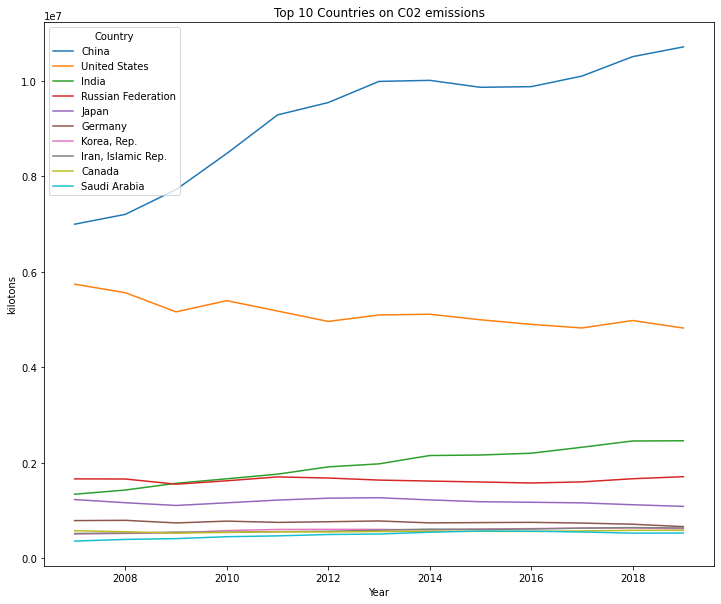

In [144]:
plt.clf()
plt.figure(figsize=(12,10))
plt.title('Top 10 Countries on C02 emissions')
plt.ylabel('kilotons')
ax = sns.lineplot(x='Year', y='EN.ATM.CO2E.KT', data=co2_em_df_top10, hue='Country', hue_order=co2_em_df_top10_list)
plt.show()

China and the United States have the most CO2 emission contribution compared to the other 8 with China trending upwards.

#### CO2 Emissions per capita for each country

In [145]:
# Get the the top 10 countries with the highest average C02 emissions per capita 2007-2019
co2_em_pc_df = co2_df[['Country', 'Year', 'EN.ATM.CO2E.PC']].dropna()

co2_em_pc_df_top10_list = co2_em_pc_df.groupby('Country')\
                                      .mean()\
                                      .reset_index()\
                                      .sort_values('EN.ATM.CO2E.PC',ascending=False)\
                                      .head(10)['Country']\
                                      .tolist()

co2_em_pc_df_top10 = co2_em_pc_df[co2_em_pc_df['Country'].isin(co2_em_pc_df_top10_list)]

print(co2_em_pc_df_top10_list)

['Qatar', 'Kuwait', 'Bahrain', 'United Arab Emirates', 'Luxembourg', 'Brunei Darussalam', 'Australia', 'United States', 'Saudi Arabia', 'Oman']


<Figure size 432x288 with 0 Axes>

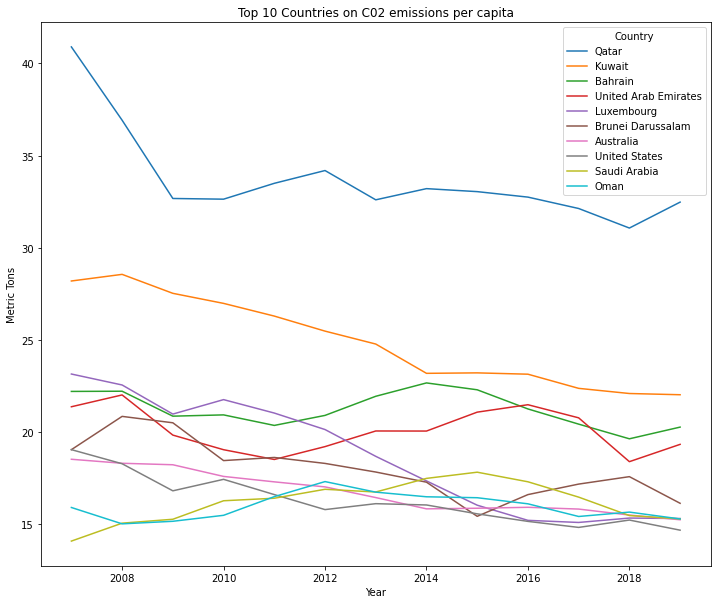

In [146]:
plt.clf()
plt.figure(figsize=(12,10))
plt.title('Top 10 Countries on C02 emissions per capita')
plt.ylabel('Metric Tons')
ax = sns.lineplot(x='Year', y='EN.ATM.CO2E.PC', data=co2_em_pc_df_top10, hue='Country', hue_order=co2_em_pc_df_top10_list)
plt.show()

On the other hand, with regards to CO2 emissions per capita, Qatar has the most with significant margin against the other top countries.  Also, the top 2 countries, Qatar and Kuwait, have their CO2 emissions per capita trending downwards.

#### CO2 emissions Summary

Overall, based the viable CO2 data obtained, we can take some of the top countries on CO2 emissions and analyze those closer compared to the other data we have.

### Air Pollution

#### Loading and checking dataset

In [147]:
pollution_descdf, pollution_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_Pollution_World_Development_Indicators/World_Bank_Pollution_World_Development_Indicators_Data.csv')

In [148]:
display(pollution_descdf.sort_values('Series Code'))

,Series Code,Series Name
0,EN.ATM.PM25.MC.M3,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
3,EN.ATM.PM25.MC.T1.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)"
2,EN.ATM.PM25.MC.T2.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)"
4,EN.ATM.PM25.MC.T3.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)"
1,EN.ATM.PM25.MC.ZS,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"


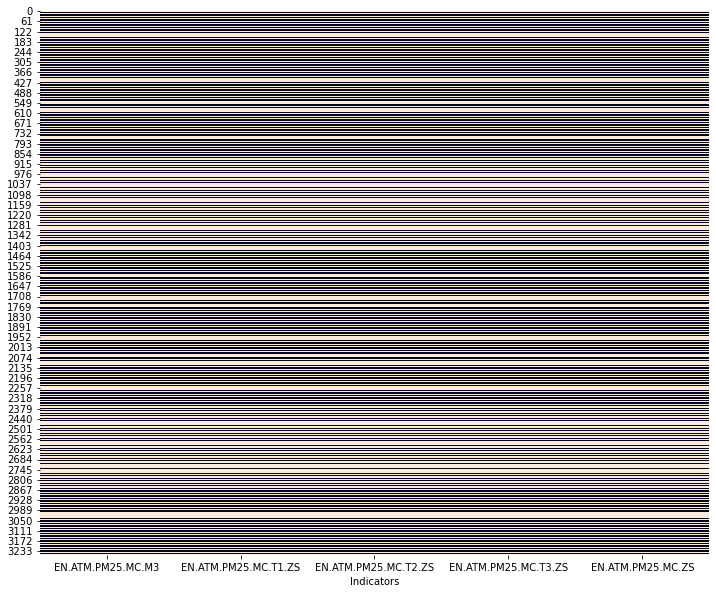

Percentage of Null values in Dataset:


EN.ATM.PM25.MC.M3       52.319508
EN.ATM.PM25.MC.T1.ZS    52.319508
EN.ATM.PM25.MC.T2.ZS    52.319508
EN.ATM.PM25.MC.T3.ZS    52.319508
EN.ATM.PM25.MC.ZS       52.319508
dtype: float64

Year = 2007


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2008


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2009


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2010


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2011


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2012


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2013


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2014


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2015


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2016


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2017


EN.ATM.PM25.MC.M3       10.599078
EN.ATM.PM25.MC.T1.ZS    10.599078
EN.ATM.PM25.MC.T2.ZS    10.599078
EN.ATM.PM25.MC.T3.ZS    10.599078
EN.ATM.PM25.MC.ZS       10.599078
dtype: float64

Year = 2018


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2019


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2020


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

Year = 2021


EN.ATM.PM25.MC.M3       100.0
EN.ATM.PM25.MC.T1.ZS    100.0
EN.ATM.PM25.MC.T2.ZS    100.0
EN.ATM.PM25.MC.T3.ZS    100.0
EN.ATM.PM25.MC.ZS       100.0
dtype: float64

In [149]:
visualize_nulls(pollution_df)

Unfortunately, this air pollution data is only available from 2010 to 2017

#### Mean Annual Exposure to Air Pollution

We check this metric out as others are more subjective as they are measured aganist WHO level.

In [150]:
pollution_df = pollution_df[pollution_df['Year'].isin(range(2010,2018))]

In [151]:
# Get the the top 10 countries with the highest average C02 emissions 2007-2019
pollution_tot_df = pollution_df[['Country', 'Year', 'EN.ATM.PM25.MC.M3']].dropna()

pollution_tot_df_top10_list = pollution_tot_df.groupby('Country')\
                                .mean()\
                                .reset_index()\
                                .sort_values('EN.ATM.PM25.MC.M3',ascending=False)\
                                .head(10)['Country']\
                                .tolist()

pollution_tot_df_top10 = pollution_tot_df[pollution_tot_df['Country'].isin(pollution_tot_df_top10_list)]

print(pollution_tot_df_top10_list)

['Nepal', 'India', 'Qatar', 'Saudi Arabia', 'Egypt, Arab Rep.', 'Niger', 'Bahrain', 'Bangladesh', 'Cameroon', 'Iraq']


#### Air Pollution dataset Summary

Aside from India, we can't compare this to the top countries in terms of CO2 emissions.  We may need to exclude this set on what drivers/indicators of climate change we will check.

### Other Gas Emissions

#### Loading and checking dataset

In [152]:
othergas_descdf, othergas_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_Othergas_World_Development_Indicators/World_Bank_Othergas_World_Development_Indicators_Data.csv')

In [153]:
display(othergas_descdf.sort_values('Series Code'))

,Series Code,Series Name
1,EN.ATM.GHGO.KT.CE,"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)"
4,EN.ATM.GHGT.KT.CE,Total greenhouse gas emissions (kt of CO2 equivalent)
2,EN.ATM.HFCG.KT.CE,HFC gas emissions (thousand metric tons of CO2 equivalent)
3,EN.ATM.METH.KT.CE,Methane emissions (kt of CO2 equivalent)
0,EN.ATM.NOXE.KT.CE,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
5,EN.ATM.SF6G.KT.CE,SF6 gas emissions (thousand metric tons of CO2 equivalent)


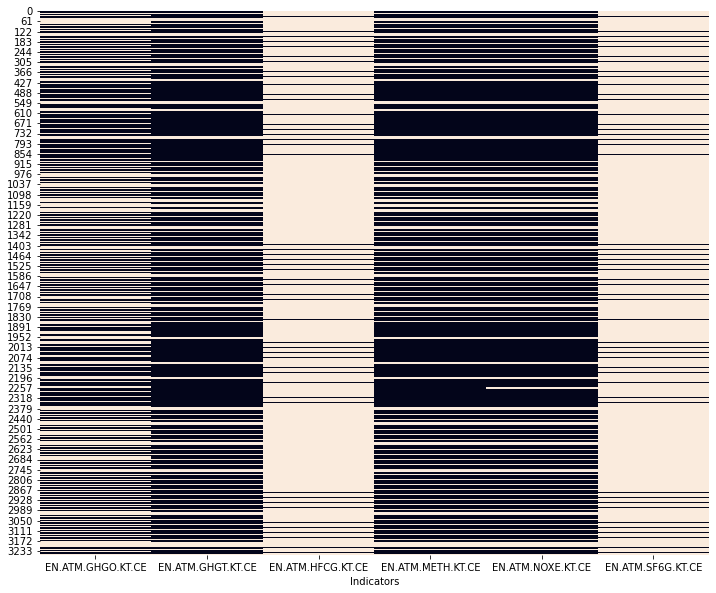

Percentage of Null values in Dataset:


EN.ATM.GHGO.KT.CE    44.086022
EN.ATM.GHGT.KT.CE    23.717358
EN.ATM.HFCG.KT.CE    91.643625
EN.ATM.METH.KT.CE    23.717358
EN.ATM.NOXE.KT.CE    24.116743
EN.ATM.SF6G.KT.CE    91.643625
dtype: float64

Year = 2007


EN.ATM.GHGO.KT.CE     15.668203
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2008


EN.ATM.GHGO.KT.CE    15.668203
EN.ATM.GHGT.KT.CE    11.981567
EN.ATM.HFCG.KT.CE    37.788018
EN.ATM.METH.KT.CE    11.981567
EN.ATM.NOXE.KT.CE    12.442396
EN.ATM.SF6G.KT.CE    37.788018
dtype: float64

Year = 2009


EN.ATM.GHGO.KT.CE     15.668203
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2010


EN.ATM.GHGO.KT.CE    15.668203
EN.ATM.GHGT.KT.CE    11.981567
EN.ATM.HFCG.KT.CE    36.866359
EN.ATM.METH.KT.CE    11.981567
EN.ATM.NOXE.KT.CE    12.442396
EN.ATM.SF6G.KT.CE    36.866359
dtype: float64

Year = 2011


EN.ATM.GHGO.KT.CE     15.207373
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2012


EN.ATM.GHGO.KT.CE     15.207373
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2013


EN.ATM.GHGO.KT.CE     17.050691
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2014


EN.ATM.GHGO.KT.CE     17.050691
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2015


EN.ATM.GHGO.KT.CE     17.050691
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2016


EN.ATM.GHGO.KT.CE     17.050691
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2017


EN.ATM.GHGO.KT.CE    100.000000
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2018


EN.ATM.GHGO.KT.CE    100.000000
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2019


EN.ATM.GHGO.KT.CE    100.000000
EN.ATM.GHGT.KT.CE     11.981567
EN.ATM.HFCG.KT.CE    100.000000
EN.ATM.METH.KT.CE     11.981567
EN.ATM.NOXE.KT.CE     12.442396
EN.ATM.SF6G.KT.CE    100.000000
dtype: float64

Year = 2020


EN.ATM.GHGO.KT.CE    100.0
EN.ATM.GHGT.KT.CE    100.0
EN.ATM.HFCG.KT.CE    100.0
EN.ATM.METH.KT.CE    100.0
EN.ATM.NOXE.KT.CE    100.0
EN.ATM.SF6G.KT.CE    100.0
dtype: float64

Year = 2021


EN.ATM.GHGO.KT.CE    100.0
EN.ATM.GHGT.KT.CE    100.0
EN.ATM.HFCG.KT.CE    100.0
EN.ATM.METH.KT.CE    100.0
EN.ATM.NOXE.KT.CE    100.0
EN.ATM.SF6G.KT.CE    100.0
dtype: float64

In [154]:
visualize_nulls(othergas_df)

* Data is only up to 2019
* Only Green house gases, Methane and Nitrous Oxide have significant amount of data on this set

In [155]:
# remove records with year 2020 and 2021
othergas_df = othergas_df[~othergas_df['Year'].isin([2020,2021])]

#### Green house gases

We check green house gases further as these do have some impact on global warming.

In [156]:
# Get the the top 10 countries with the highest average C02 emissions 2007-2019
ghg_df = othergas_df[['Country', 'Year', 'EN.ATM.GHGT.KT.CE']].dropna()

ghg_df_top10_list = ghg_df.groupby('Country')\
                                .mean()\
                                .reset_index()\
                                .sort_values('EN.ATM.GHGT.KT.CE',ascending=False)\
                                .head(10)['Country']\
                                .tolist()

ghg_df_top10 = ghg_df[ghg_df['Country'].isin(ghg_df_top10_list)]

print(ghg_df_top10_list)

['China', 'United States', 'India', 'Russian Federation', 'Japan', 'Brazil', 'Germany', 'Indonesia', 'Iran, Islamic Rep.', 'Canada']


#### Methane

In [157]:
# Get the the top 10 countries with the highest average C02 emissions 2007-2019
methane_df = othergas_df[['Country', 'Year', 'EN.ATM.METH.KT.CE']].dropna()

methane_df_top10_list = methane_df.groupby('Country')\
                                .mean()\
                                .reset_index()\
                                .sort_values('EN.ATM.METH.KT.CE',ascending=False)\
                                .head(10)['Country']\
                                .tolist()

methane_df_top10 = methane_df[methane_df['Country'].isin(methane_df_top10_list)]

print(methane_df_top10_list)

['China', 'United States', 'India', 'Russian Federation', 'Brazil', 'Indonesia', 'Iran, Islamic Rep.', 'Venezuela, RB', 'Pakistan', 'Australia']


#### Nitrous Oxide

In [158]:
# Get the the top 10 countries with the highest average C02 emissions 2007-2019
nox_df = othergas_df[['Country', 'Year', 'EN.ATM.NOXE.KT.CE']].dropna()

nox_df_top10_list = nox_df.groupby('Country')\
                                .mean()\
                                .reset_index()\
                                .sort_values('EN.ATM.NOXE.KT.CE',ascending=False)\
                                .head(10)['Country']\
                                .tolist()

nox_df_top10 = nox_df[nox_df['Country'].isin(nox_df_top10_list)]

print(nox_df_top10_list)

['China', 'United States', 'India', 'Brazil', 'Indonesia', 'Australia', 'Cameroon', 'Pakistan', 'Russian Federation', 'Argentina']


#### Other Gas Emissions Summary

These countries do have a lot in common with the CO2 emissions data so we can use these together.

### Check data availability

To narrow down the data points we will analyze, we will take these countries:
* United States
* China
* India
* Russia
* Japan

For the metrics:

| Dataset | Series Code | Series Description/Name |
| --- | --- | --- |
|CO2| EN.ATM.CO2E.KT | CO2 emissions (kt)|
|Other Gas | EN.ATM.GHGT.KT.CE | Total greenhouse gas emissions (kt of CO2 equivalent) |
|Other Gas | EN.ATM.METH.KT.CE | Methane emissions (kt of CO2 equivalent)|
|Other Gas | EN.ATM.NOXE.KT.CE | Nitrous oxide emissions (thousand metric tons of CO2 equivalent)|

In [159]:
countries_list = ['China', 'United States', 'India', 'Russian Federation', 'Japan']

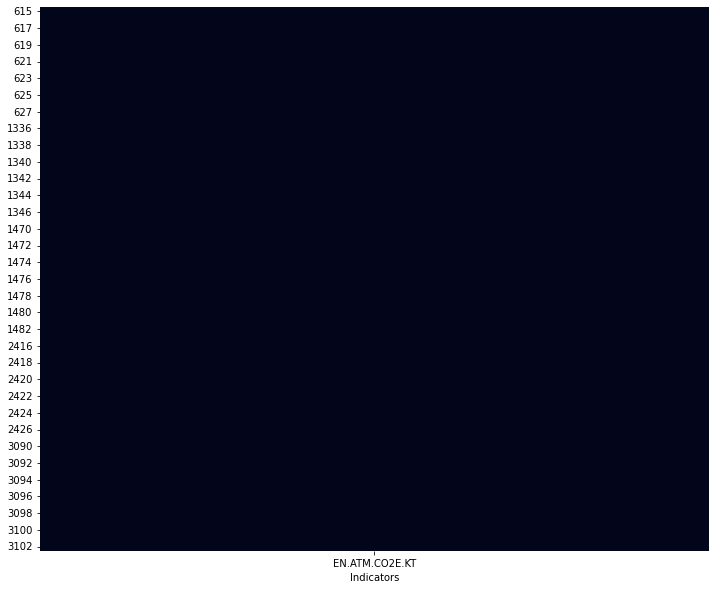

Percentage of Null values in Dataset:


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2007


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2008


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2009


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2010


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2011


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2012


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2013


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2014


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2015


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2016


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2017


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2018


EN.ATM.CO2E.KT    0.0
dtype: float64

Year = 2019


EN.ATM.CO2E.KT    0.0
dtype: float64

In [160]:
co2_df = co2_df[['Country','Year','EN.ATM.CO2E.KT']]
co2_df = co2_df[co2_df['Country'].isin(countries_list)]
visualize_nulls(co2_df)

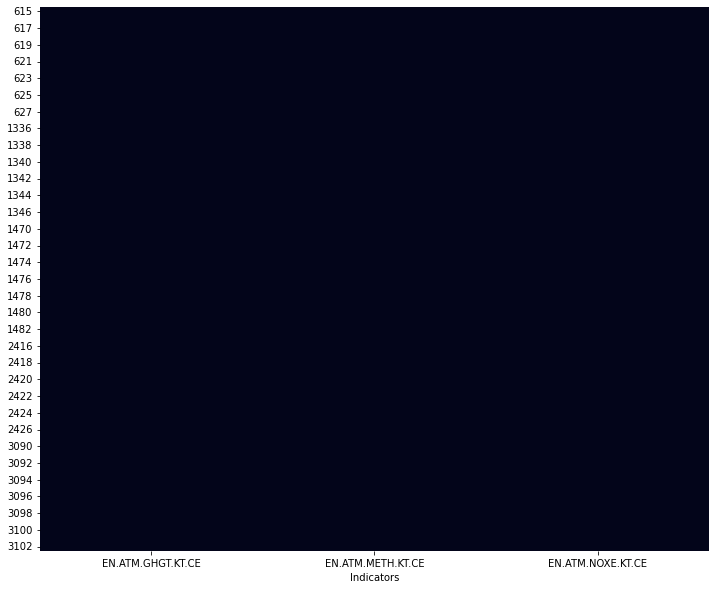

Percentage of Null values in Dataset:


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2007


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2008


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2009


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2010


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2011


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2012


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2013


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2014


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2015


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2016


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2017


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2018


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

Year = 2019


EN.ATM.GHGT.KT.CE    0.0
EN.ATM.METH.KT.CE    0.0
EN.ATM.NOXE.KT.CE    0.0
dtype: float64

In [161]:
othergas_df = othergas_df[['Country','Year','EN.ATM.GHGT.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE']]
othergas_df = othergas_df[othergas_df['Country'].isin(countries_list)]
visualize_nulls(othergas_df)

### Climate Change/Pollution Indicators Summary

Based on the above datasets, we can take the following countries:
* United States
* China
* India
* Russia
* Japan

These countries are large in terms of land area and population to have significant impact to the environment for us to look into further.

On the other hand, we can take the gas emissions data (CO2, GHG, Methane, Nitrous Oxide) and check them against developement indicators:

| Dataset | Series Code | Series Description/Name |
| --- | --- | --- |
|CO2| EN.ATM.CO2E.KT | CO2 emissions (kt)|
|Other Gas | EN.ATM.GHGT.KT.CE | Total greenhouse gas emissions (kt of CO2 equivalent) |
|Other Gas | EN.ATM.METH.KT.CE | Methane emissions (kt of CO2 equivalent)|
|Other Gas | EN.ATM.NOXE.KT.CE | Nitrous oxide emissions (thousand metric tons of CO2 equivalent)|

## World Development Indicators

We check the available data in the World Development Indicators datasets for the countries determined earlier.

### GDP

#### Loading and checking the dataset

In [125]:
gdp_descdf, gdp_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_GDP_World_Development_Indicators/World_Bank_GDP_World_Development_Indicators_Data.csv')

In [126]:
gdp_df = gdp_df[gdp_df['Country'].isin(countries_list)]

In [127]:
display(gdp_descdf.sort_values('Series Code'))

,Series Code,Series Name
0,NY.GDP.MKTP.CD,GDP (current US$)
3,NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
1,NY.GDP.PCAP.CD,GDP per capita (current US$)
2,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)


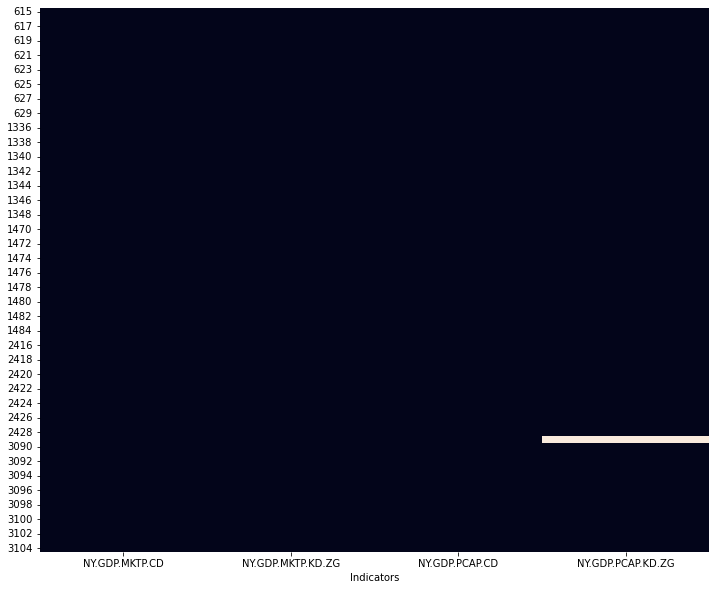

Percentage of Null values in Dataset:


NY.GDP.MKTP.CD       0.000000
NY.GDP.MKTP.KD.ZG    0.000000
NY.GDP.PCAP.CD       0.000000
NY.GDP.PCAP.KD.ZG    1.333333
dtype: float64

Year = 2007


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2008


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2009


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2010


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2011


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2012


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2013


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2014


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2015


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2016


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2017


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2018


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2019


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2020


NY.GDP.MKTP.CD       0.0
NY.GDP.MKTP.KD.ZG    0.0
NY.GDP.PCAP.CD       0.0
NY.GDP.PCAP.KD.ZG    0.0
dtype: float64

Year = 2021


NY.GDP.MKTP.CD        0.0
NY.GDP.MKTP.KD.ZG     0.0
NY.GDP.PCAP.CD        0.0
NY.GDP.PCAP.KD.ZG    20.0
dtype: float64

In [128]:
visualize_nulls(gdp_df)

#### GDP Dataset Findings

We can use the GDP annual growth indicators for the given countries.

### Land Use

#### Loading and checking the dataset

In [129]:
landuse_descdf, landuse_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_LandUse_World_Development_Indicators/World_Bank_LandUse_World_Development_Indicators_Data.csv')

In [130]:
landuse_df = landuse_df[landuse_df['Country'].isin(countries_list)]

In [131]:
display(landuse_descdf.sort_values('Series Code'))

,Series Code,Series Name
7,AG.LND.AGRI.K2,Agricultural land (sq. km)
8,AG.LND.AGRI.ZS,Agricultural land (% of land area)
10,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 meters (sq. km)
6,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 meters (% of total land area)
5,AG.LND.EL5M.UR.K2,Urban land area where elevation is below 5 meters (sq. km)
9,AG.LND.EL5M.UR.ZS,Urban land area where elevation is below 5 meters (% of total land area)
0,AG.LND.FRST.K2,Forest area (sq. km)
1,AG.LND.FRST.ZS,Forest area (% of land area)
2,AG.LND.PRCP.MM,Average precipitation in depth (mm per year)
3,AG.LND.TOTL.RU.K2,Rural land area (sq. km)


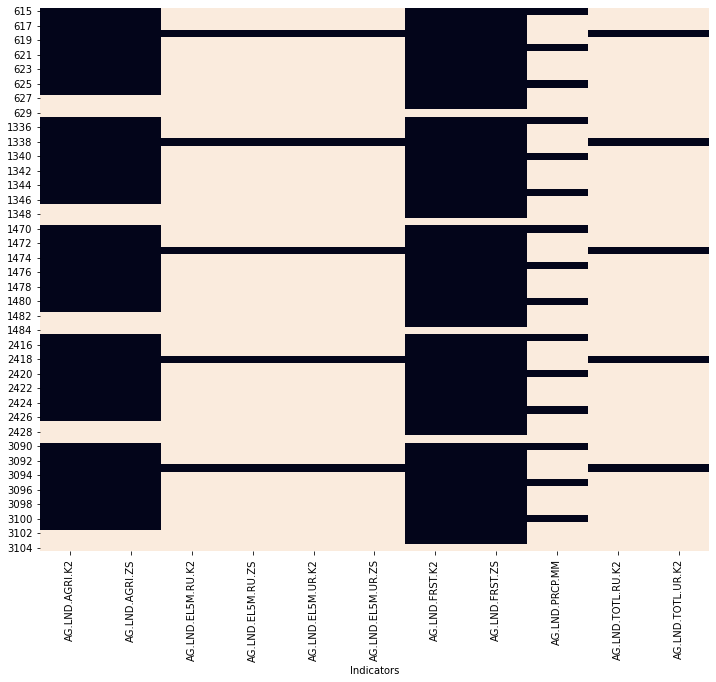

Percentage of Null values in Dataset:


AG.LND.AGRI.K2       20.000000
AG.LND.AGRI.ZS       20.000000
AG.LND.EL5M.RU.K2    93.333333
AG.LND.EL5M.RU.ZS    93.333333
AG.LND.EL5M.UR.K2    93.333333
AG.LND.EL5M.UR.ZS    93.333333
AG.LND.FRST.K2        6.666667
AG.LND.FRST.ZS        6.666667
AG.LND.PRCP.MM       80.000000
AG.LND.TOTL.RU.K2    93.333333
AG.LND.TOTL.UR.K2    93.333333
dtype: float64

Year = 2007


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM         0.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2008


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2009


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2010


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2      0.0
AG.LND.EL5M.RU.ZS      0.0
AG.LND.EL5M.UR.K2      0.0
AG.LND.EL5M.UR.ZS      0.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2      0.0
AG.LND.TOTL.UR.K2      0.0
dtype: float64

Year = 2011


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2012


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM         0.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2013


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2014


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2015


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2016


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2017


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM         0.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2018


AG.LND.AGRI.K2         0.0
AG.LND.AGRI.ZS         0.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2019


AG.LND.AGRI.K2       100.0
AG.LND.AGRI.ZS       100.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2020


AG.LND.AGRI.K2       100.0
AG.LND.AGRI.ZS       100.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2         0.0
AG.LND.FRST.ZS         0.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

Year = 2021


AG.LND.AGRI.K2       100.0
AG.LND.AGRI.ZS       100.0
AG.LND.EL5M.RU.K2    100.0
AG.LND.EL5M.RU.ZS    100.0
AG.LND.EL5M.UR.K2    100.0
AG.LND.EL5M.UR.ZS    100.0
AG.LND.FRST.K2       100.0
AG.LND.FRST.ZS       100.0
AG.LND.PRCP.MM       100.0
AG.LND.TOTL.RU.K2    100.0
AG.LND.TOTL.UR.K2    100.0
dtype: float64

In [132]:
visualize_nulls(landuse_df)

#### Land Use Dataset Findings

We can use the Forest Area metrics for the given countries.

### Urbanization

#### Loading and checking the dataset

In [133]:
urb_descdf, urb_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_Urbanization_World_Development_Indicators/World_Bank_Urbanization_World_Development_Indicators_Data.csv')

In [134]:
urb_df = urb_df[urb_df['Country'].isin(countries_list)]

In [135]:
display(urb_descdf.sort_values('Series Code'))

,Series Code,Series Name
6,SP.POP.GROW,Population growth (annual %)
7,SP.POP.TOTL,"Population, total"
0,SP.RUR.TOTL,Rural population
1,SP.RUR.TOTL.ZG,Rural population growth (annual %)
2,SP.RUR.TOTL.ZS,Rural population (% of total population)
4,SP.URB.GROW,Urban population growth (annual %)
3,SP.URB.TOTL,Urban population
5,SP.URB.TOTL.IN.ZS,Urban population (% of total population)


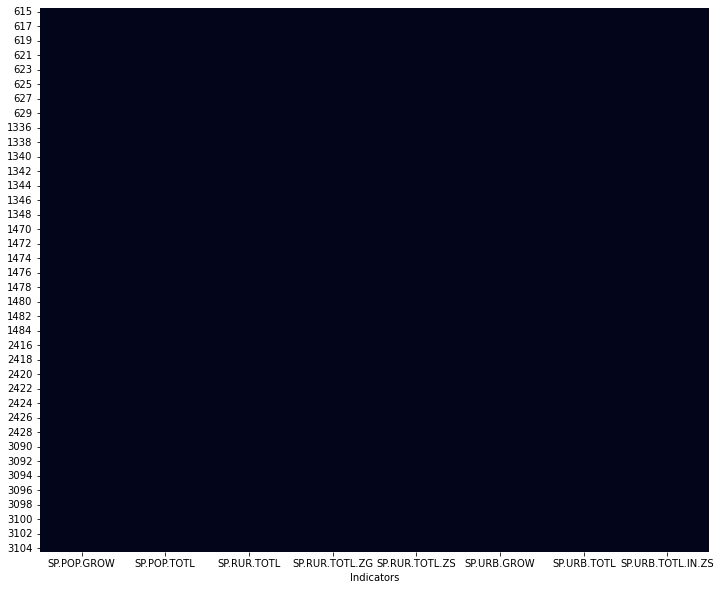

Percentage of Null values in Dataset:


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2007


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2008


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2009


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2010


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2011


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2012


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2013


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2014


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2015


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2016


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2017


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2018


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2019


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2020


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

Year = 2021


SP.POP.GROW          0.0
SP.POP.TOTL          0.0
SP.RUR.TOTL          0.0
SP.RUR.TOTL.ZG       0.0
SP.RUR.TOTL.ZS       0.0
SP.URB.GROW          0.0
SP.URB.TOTL          0.0
SP.URB.TOTL.IN.ZS    0.0
dtype: float64

In [136]:
visualize_nulls(urb_df)

#### Urbanization Dataset Findings

We can use the all metrics here for the given countries.  However, we can use the annual growth percentages to see some trends.

### World Development Indicators Summary

On checking the datasets, we decided to take these mertics/indicators and how they relate to the Climate Change data we checked before this.

| Dataset | Series Code | Series Description/Name |
| --- | --- | --- |
| GDP | NY.GDP.MKTP.KD.ZG | GDP growth (annual %) |
| GDP | NY.GDP.PCAP.KD.ZG | GDP per capita growth (annual %) |
| Land Use | AG.LND.FRST.K2 | Forest area (sq. km) |
| Land Use | AG.LND.FRST.ZS | Forest area (% of land area) |
| Urbanization | SP.POP.GROW | Population growth (annual %) |
| Urbanization | SP.RUR.TOTL.ZG | Rural population growth (annual %) |
| Urbanization | SP.URB.GROW | Urban population growth (annual %) |